In [1]:
import numpy as np
import scipy as sp
import astropy as ap
import matplotlib.pyplot as plt
import scipy.stats
import astropy.units as u
import astropy.constants as c

rng = np.random.RandomState(193)

# Given information

The ratio of the area of a square to the area of a circle inscribed in that square is $\pi / 4$.

In [2]:
def square(l, ax):
    ax.plot([-l, l], [-l, -l], 'k-')
    ax.plot([-l, l], [l, l], 'k-')
    ax.plot([-l, -l], [-l, l], 'k-')
    ax.plot([l, l], [-l, l], 'k-')

In [3]:
def circle(l, ax):
    theta = np.linspace(0, 360, 100)
    theta *= u.degree
    x = l * np.cos(theta.to(u.rad))
    y = l * np.sin(theta.to(u.rad))
    ax.plot(x, y, 'k-')

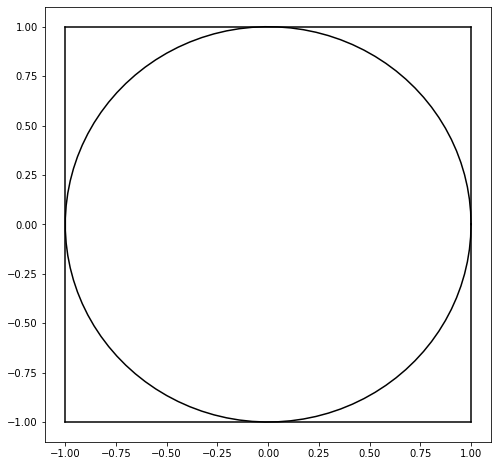

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))
square(1, ax=ax)
circle(1, ax=ax)

In [5]:
def isin(x, y, r=1):
    """
    Whether or not a point at (x, y) is within a circle of radius rr.
    """
    
    norm = np.sqrt(x**2 + y**2)
    return r > norm

In [6]:
# Generate N random points on the interval [-1, 1]
N = 1000000
points = sp.stats.uniform.rvs(loc=-1, scale=2, size=(2, N))

In [7]:
# Determine how many (and which, for plotting) are within a circle of radius 1
ind = isin(points[0], points[1], 1)
N_in = ind.sum()

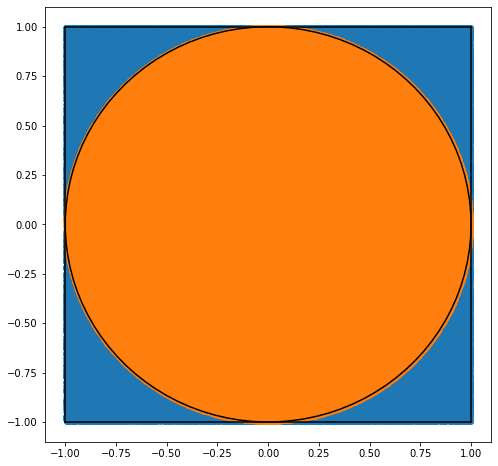

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
square(1, ax=ax)
circle(1, ax=ax)

ax.scatter(points[0][~ind], points[1][~ind], marker=".", ls="None")
ax.scatter(points[0][ind], points[1][ind], marker=".", ls="None")
plt.show()

In [9]:
my_pi = 4 * N_in / N
perc_diff = (np.pi - my_pi) / np.pi

In [10]:
my_pi, perc_diff

(3.141724, -4.180886088359036e-05)

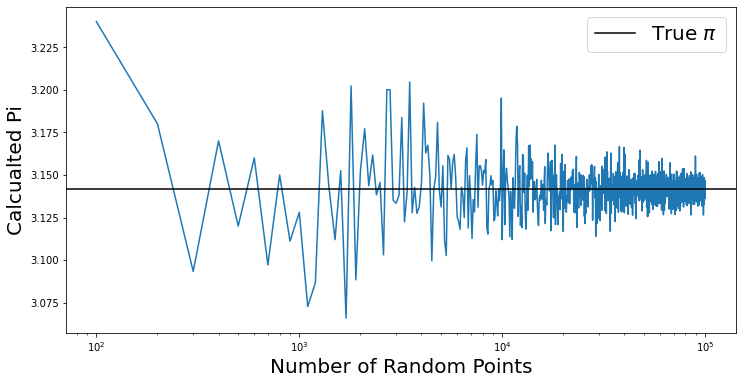

In [11]:
# Fed asked me to make a plot of N vs calcualted pi

fig, ax = plt.subplots(figsize=(12, 6))

N_vals = np.linspace(100, 100000, num=1000)
my_pi_vals = []
for N in N_vals:
    points = sp.stats.uniform.rvs(loc=-1, scale=2, size=(2, int(N)))
    ind = isin(points[0], points[1], 1)
    N_in = ind.sum()
    my_pi = 4 * N_in / N
    perc_diff = (np.pi - my_pi) / np.pi
    
    my_pi_vals.append(my_pi)
    
ax.semilogx(N_vals, my_pi_vals)
ax.set_xlabel("Number of Random Points", fontsize=20)
ax.set_ylabel("Calcualted Pi", fontsize=20)
ax.axhline(y=np.pi, c="k", label=r"True $\pi$")
plt.legend(fontsize=20)

plt.savefig("monte_pi.pdf")
plt.show()